# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop columns with missing data
ames.dropna(axis=1, inplace=True)

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [4]:
import matplotlib.pyplot as plt

<Figure size 1500x400 with 0 Axes>

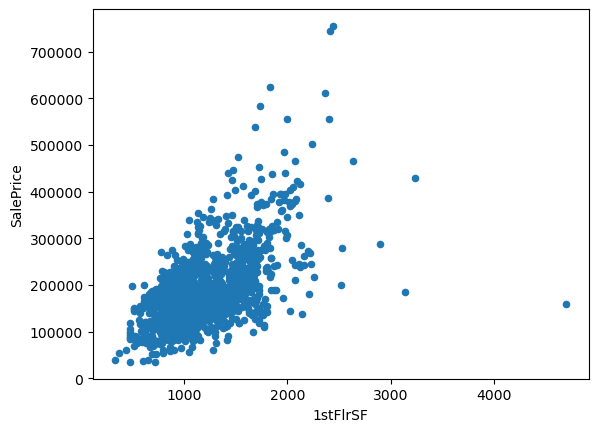

In [5]:
# Your code here - continuous numeric predictor
# Scatter Plot of 1stFlrSF vs SalePrice

fig = plt.figure(figsize=(15,4))
ames.plot.scatter(x='1stFlrSF', y='SalePrice');

### Discrete Numeric Predictor

<Figure size 1500x400 with 0 Axes>

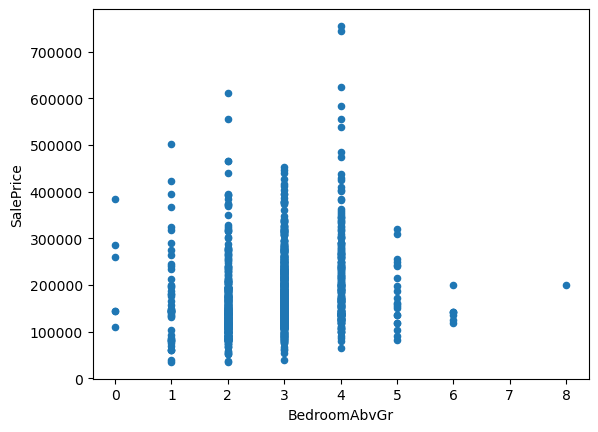

In [6]:
# Your code here - discrete numeric predictor
# Scatter Plot of BedroomAbvGr vs SalePrice

fig = plt.figure(figsize=(15,4))
ames.plot.scatter(x='BedroomAbvGr', y='SalePrice');

### String Categorical Predictor

<Figure size 1500x400 with 0 Axes>

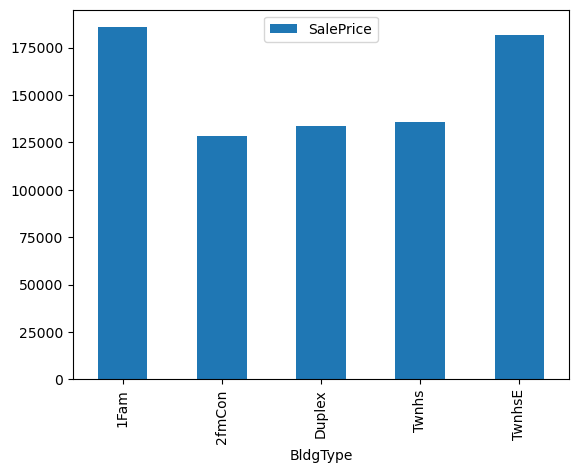

In [7]:
# Your code here - string categorical predictor
# Bar Plot of BldgType vs SalePrice

fig = plt.figure(figsize=(15,4))
ames.groupby("BldgType").mean('SalePrice').plot.bar(y='SalePrice');

### Discrete Categorical Predictor

<Figure size 1500x400 with 0 Axes>

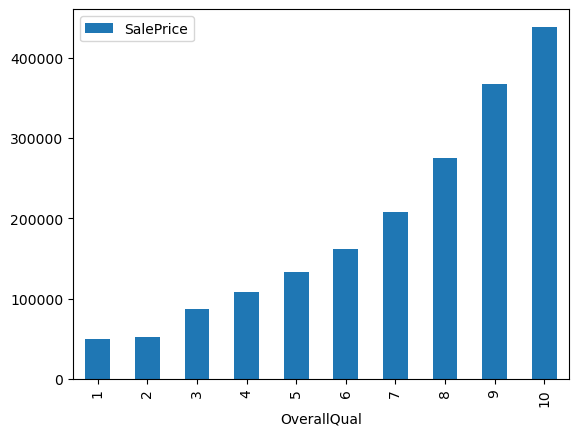

In [8]:
# Your code here - discrete categorical predictor
# Bar Plot of OverallQual vs SalePrice

fig = plt.figure(figsize=(15,4))
ames.groupby("OverallQual").mean('SalePrice').plot.bar(y='SalePrice');

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [9]:
# Your code here - prepare X and y, including one-hot encoding
from sklearn.preprocessing import OneHotEncoder

y = ames['SalePrice']
X = ames[['1stFlrSF', 'BldgType', 'OverallQual']]
X

,1stFlrSF,BldgType,OverallQual
Id,,,
1,856,1Fam,7
2,1262,1Fam,6
3,920,1Fam,7
4,961,1Fam,7
5,1145,1Fam,8
...,...,...,...
1456,953,1Fam,6
1457,2073,1Fam,6
1458,1188,1Fam,7


In [10]:
X = pd.get_dummies(X, columns=["BldgType"], drop_first=True, dtype=int)
X

,1stFlrSF,OverallQual,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
Id,,,,,,
1,856,7,0,0,0,0
2,1262,6,0,0,0,0
3,920,7,0,0,0,0
4,961,7,0,0,0,0
5,1145,8,0,0,0,0
...,...,...,...,...,...,...
1456,953,6,0,0,0,0
1457,2073,6,0,0,0,0
1458,1188,7,0,0,0,0


In [28]:
# Your answer here - which category or categories were dropped?
"""
BldgType_1fm was dropped
"""

In [11]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     573.8
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        21:23:43   Log-Likelihood:                -17657.
No. Observations:                1460   AIC:                         3.533e+04
Df Residuals:                    1453   BIC:                         3.537e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.144e+05   5416.686    -

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

/Users/scarlettvalentin/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/Users/scarlettvalentin/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/Users/scarlettvalentin/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fut

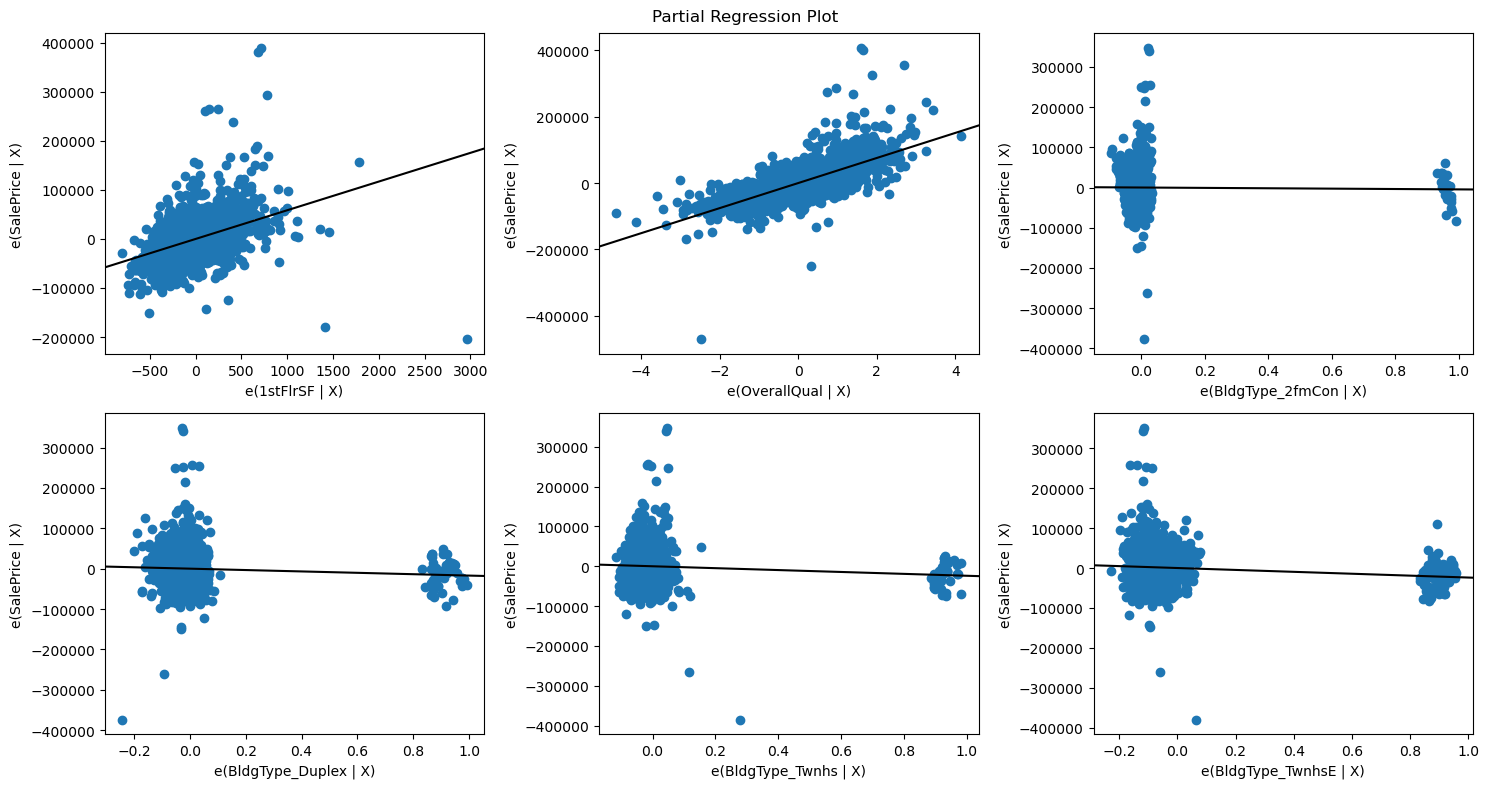

In [14]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx = list(X.columns.values),
    grid=(2,3),
    fig=fig)
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [16]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(X))

mean_absolute_error(y, y_pred)

29742.466825473763

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here
"""
This model explains 70% of the variance in Sale Price and the model is statistically significant with a F-statistic p-value 
below the 5% significance level. On average, the model is off by $29,742 of the Sale Price. BldgType_2fmCon and BldgType_Duplex 
are not statistically significant, but the rest of the features are. 

const: When all other variables are zero, the Sale Price of a home is expected to be -$114,400. This doesn't hold any meaning
to the current scenario because that is not a legitimate sale price.

1stFlrSF: For every increase in one square foot of the 1st Floor area, we would expect the Sale Price of the home to increase $58.47.

OverallQu: For every increase in 1 categorical value of overall quality, we would expect the Sale Price of the home to increase 
$37,810.

BldgType_Twnhs: Compared to a single family home, we would expect the Sale Price of an inside unit townhouse to decrease $23,830.

BldgType_TwnhsE: Compared to a single family home, we would expect the Sale Price of an end unit townhouse to decrease $23,870.

The partial regression plots show a linear, non-zero slope for both 1stFlSF and OverallQu, which means they are beneficial to add
to the model. The plots for all 4 BldgType dummy variable show 2 clusters of points.
"""

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [38]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.